# Analisis del consumo de lácteos en Argentina

### Tabajo practico para aplicacion de herramientas de python en el analisis de datos

En el presente trabajo práctico haremos un analisis de las bases de datos de consumo de lacteos en Argentina, para comprender su evolucion y aspectos mas relevantes con la ayuda de las herramientas que nos provee python. Utilizaremos principalmente herramientas de la librería _pandas_ que son para el trabajo con dataframes.

## Importaciones y definiciones

* En esta primera sección se hace la importación de todas las librerías necesarias para trabajar. Si en un principio no tenemos bien claro cuales utilizaremos se pueden ir agregando en la medida que las vamos necesitando, pero siempre en esta seccion. Esta es una forma de asegurarnos la reproducibilidad de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Importamos y guardamos las tablas de excel y csv en dataframes de pandas:

In [2]:
df_lacteos_solidos = pd.read_csv("estimacion-del-consumo-de-productos-lacteos-solidos.csv")

In [3]:
df_lacteos_liquidos = pd.read_csv("estimacion-del-consumo-de-productos-lacteos-liquidos.csv")

In [4]:
grupos_productos = pd.read_excel("productos.xlsx")

In [5]:
type(grupos_productos)

pandas.core.frame.DataFrame

Como puede verse el tipo de objeto en el que se guardaron los datos son DataFrames de pandas.

__Tip -- decirle a pandas que tipo de dato queremos__

* Hacemos una vista previa de las tablas para asegurarnos de que se importaron bien:

In [6]:
df_lacteos_liquidos.head(3)

,pais_id,pais,año,mes,ccp,producto,distribución,unidad_med_distribución,consumo_per_cápita,uni_med_consumu_id,uni_med_consumo _per_capita
0,32,Argentina,2000,1,22110,Leche pasteurizada,67426.79,Miles de litros,1.78,l,Litros
1,32,Argentina,2000,1,22110,Leche esterilizada,63608.38,Miles de litros,1.68,l,Litros
2,32,Argentina,2000,1,22110,Leche chocolatada,2934.20,Miles de litros,0.08,l,Litros


In [7]:
df_lacteos_solidos.sample(3)

,pais_id,pais,año,mes,ccp,producto,distribución,unidad_med_distribución_id,unidad_med_distribución,consumo_per_cápita,uni_med_consumu_id,uni_med_consumo _per_capita
1685,32,Argentina,2011,9,22251,Queso fundido,1327.24,t,Toneladas,0.03,kg,Kilogramos
140,32,Argentina,2000,12,22222,Leche condensada,948.60,t,Toneladas,0.03,kg,Kilogramos
900,32,Argentina,2006,4,22211,Leche en polvo entera,1811.66,t,Toneladas,0.05,kg,Kilogramos


In [8]:
grupos_productos.tail(5)

,producto,grupo
12,Quesos de mediana humedad (pasta semidura),g3
13,Quesos de alta humedad (pasta blanda),g3
14,Yogur,g4
15,Leche esterilizada,g4
16,Leche pasteurizada,g4


## Comenzando a explorar los datos

* Traemos las columnas de las tablas de consumo de lacteos para compararlas mas facilmente:

In [9]:
df_lacteos_liquidos.columns.sort_values()

Index(['año', 'ccp', 'consumo_per_cápita', 'distribución', 'mes', 'pais',
       'pais_id', 'producto', 'uni_med_consumo _per_capita',
       'uni_med_consumu_id', 'unidad_med_distribución'],
      dtype='object')

In [10]:
df_lacteos_solidos.columns.sort_values()

Index(['año', 'ccp', 'consumo_per_cápita', 'distribución', 'mes', 'pais',
       'pais_id', 'producto', 'uni_med_consumo _per_capita',
       'uni_med_consumu_id', 'unidad_med_distribución',
       'unidad_med_distribución_id'],
      dtype='object')

* Consultamos las fechas que tienen las tablas:  
 -- "quitar duplicados" de excel

In [11]:
df_lacteos_liquidos.año.drop_duplicates() #pandas serie

0      2000
36     2001
72     2002
108    2003
144    2004
180    2005
216    2006
252    2007
288    2008
324    2009
360    2010
396    2011
432    2012
468    2013
504    2014
540    2015
576    2016
Name: año, dtype: int64

In [12]:
df_lacteos_liquidos.loc[:,['año','mes']].drop_duplicates()

,año,mes
0,2000,1
3,2000,2
6,2000,3
9,2000,4
12,2000,5
...,...,...
597,2016,8
600,2016,9
603,2016,10
606,2016,11


* Consultamos los productos de la tabla df lacteos liquidos:

In [13]:
df_lacteos_liquidos.loc[:,['producto']].drop_duplicates()

,producto
0,Leche pasteurizada
1,Leche esterilizada
2,Leche chocolatada


Ahora deberiamos hacer los mismo con la tabla df_lacteos_solidos, pero para simplificar el trabajo uniremos las tablas.

## Unión de tablas y curación de datos
### Armamos un solo dataset:

*-* __Unimos las tablas de consumo de lacteos:__

* Para trabajar mas facilmente vamos a unir las tablas de datos de lacteos liquidos y solidos en una sola:  
https://docs.google.com/presentation/d/18GpHjmPrQPoL6q1EuBdBg5RBgzLYq-fTkT-ALir1vug/edit?usp=sharing  
mas info en https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [14]:
tablas =[df_lacteos_liquidos, df_lacteos_solidos] #guardo en una lista las tablas que quiero unir

In [15]:
df_lacteos = pd.concat(tablas, ignore_index=True) #usamos la funcion concat

In [16]:
df_lacteos.sample(5)

,pais_id,pais,año,mes,ccp,producto,distribución,unidad_med_distribución,consumo_per_cápita,uni_med_consumu_id,uni_med_consumo _per_capita,unidad_med_distribución_id
1727,32,Argentina,2007,9,22251,Quesos de baja humedad (pasta dura),3807.53,Toneladas,0.10,kg,Kilogramos,t
545,32,Argentina,2015,2,22110,Leche chocolatada,5815.98,Miles de litros,0.14,l,Litros,NaN
1837,32,Argentina,2008,7,22212,Leche en polvo descremada,3315.42,Toneladas,0.08,kg,Kilogramos,t
2577,32,Argentina,2013,8,22241,Manteca,3064.13,Toneladas,0.07,kg,Kilogramos,t
2651,32,Argentina,2014,2,22241,Manteca,2662.30,Toneladas,0.06,kg,Kilogramos,t


Notar lo que ocurre con el indice de la tabla obtenida y con la columna __unidad_med_distribución_id__ que estaba solo en la tabla df_lacteos_solidos.

In [17]:
df_lacteos.iloc[0:2,0:8]

,pais_id,pais,año,mes,ccp,producto,distribución,unidad_med_distribución
0,32,Argentina,2000,1,22110,Leche pasteurizada,67426.79,Miles de litros
1,32,Argentina,2000,1,22110,Leche esterilizada,63608.38,Miles de litros


In [18]:
df_lacteos_liquidos.shape

(612, 11)

In [19]:
df_lacteos.iloc[612:615,0:8]

,pais_id,pais,año,mes,ccp,producto,distribución,unidad_med_distribución
612,32,Argentina,2000,1,22211,Leche en polvo entera,7405.02,Toneladas
613,32,Argentina,2000,1,22212,Leche en polvo descremada,856.93,Toneladas
614,32,Argentina,2000,1,22251,Quesos de baja humedad (pasta dura),4466.55,Toneladas


In [20]:
df_lacteos.shape

(3060, 12)

In [21]:
df_lacteos.tail(1)

,pais_id,pais,año,mes,ccp,producto,distribución,unidad_med_distribución,consumo_per_cápita,uni_med_consumu_id,uni_med_consumo _per_capita,unidad_med_distribución_id
3059,32,Argentina,2016,12,22290,Postres lacteos y flanes,3017.97,Toneladas,0.073,kg,Kilogramos,t


Como vemos los indices consultados coinciden con el index del dataframe por lo que la tabla generada se generó con un nuevo indice que va del cero al 3059

*-* __Agregamos una columna con los datos de la tabla grupos__

* Combinamos la tabla df_lacteos con la tabla _grupos_productos_ para crear una columna nueva en la primera en donde se asigne a cada producto su categoría correspondiente.

Debemos utilizar como clave de union entre ambas tabla una columna que este presente en ambas tablas. Recordemos la tabla _grupos_productos_:


In [22]:
grupos_productos.head()

,producto,grupo
0,Leche condensada,g1
1,Queso fundido,g1
2,Leche en polvo descremada,g1
3,Leche en polvo maternizada,g1
4,Manteca,g1


Utilizaremos como clave de unión la columna producto, pero antes es necesario consultar si el listado de productos de ambas tablas tiene coincidencias:

* Consultamos primero los productos de la tabla df_lacteos:

In [23]:
df_lacteos.loc[:,'producto'].drop_duplicates().sort_values()

619                                          Crema
618                                 Dulce de leche
2                                Leche chocolatada
620                               Leche condensada
613                      Leche en polvo descremada
3012                         Leche en polvo entera
612                         Leche en polvo entera 
1                               Leche esterilizada
0                               Leche pasteurizada
621                                        Manteca
623                       Postres lacteos y flanes
617                                  Queso fundido
616          Quesos de alta humedad (pasta blanda)
614            Quesos de baja humedad (pasta dura)
615     Quesos de mediana humedad (pasta semidura)
3022                                         Yogur
622                                         Yogur 
Name: producto, dtype: object

Observamos que hay errores de tipeo, a pesar de quitar los duplicados hay productos repetidos, en __yogur__ y __leche en polvo entera__ 

Parte de la curacion o preparación de los datos es decidir que se hace con estos casos, dado que son muy poquitos se pueden corregir facilmente. En ambos casos hay un espacio en blanco al final. Para lo que utilizaremos la funcion de pandas Series.str.rstrip https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.rstrip.html

In [24]:
df_lacteos.loc[:,'producto'] = df_lacteos.loc[:,'producto'].str.rstrip( )

Otra funcion útil para el caso de que el reemplazo hubiera sido mas complejo es __Series.str.replace__: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html?highlight=replace#pandas.Series.str.replace

* "ya que estamos" nos gustaria controlar si hay igual cantidad de registros para todos los productos:

In [25]:
df_lacteos.producto.value_counts()

Crema                                         204
Leche en polvo entera                         204
Postres lacteos y flanes                      204
Dulce de leche                                204
Yogur                                         204
Leche esterilizada                            204
Quesos de baja humedad (pasta dura)           204
Queso fundido                                 204
Quesos de mediana humedad (pasta semidura)    204
Manteca                                       204
Quesos de alta humedad (pasta blanda)         204
Leche condensada                              204
Leche pasteurizada                            204
Leche en polvo descremada                     204
Leche chocolatada                             204
Name: producto, dtype: int64

Seguimos con los productos de la tabla grupos_productos:

In [26]:
grupos_productos.producto

0                               Leche condensada
1                                  Queso fundido
2                      Leche en polvo descremada
3                     Leche en polvo maternizada
4                                        Manteca
5                                          Crema
6                                        Helados
7                       Postres lacteos y flanes
8            Quesos de baja humedad (pasta dura)
9                              Leche chocolatada
10                         Leche en polvo entera
11                                Dulce de leche
12    Quesos de mediana humedad (pasta semidura)
13         Quesos de alta humedad (pasta blanda)
14                                         Yogur
15                            Leche esterilizada
16                            Leche pasteurizada
Name: producto, dtype: object

Podemos por ejemplo preguntarnos si todos los productos de la tabla _df_lacteos_ estan en la tabla _grupos_productos_:

 -- en excel es equivalente a quitar duplicados de la primera tabla y luego utilizar la función "buscarv" para buscar los valores de cada fila en la segunda tabla:

Primero nos quedamos con los valores únicos:

In [27]:
productos_tabla_lacteos = df_lacteos.loc[:,'producto'].drop_duplicates().sort_values()

Ahora consultamos cuales de esos valores estan dentro de la tabla _grupo_productos_

In [28]:
productos_tabla_lacteos.isin(grupos_productos.producto)

619    True
618    True
2      True
620    True
613    True
612    True
1      True
0      True
621    True
623    True
617    True
616    True
614    True
615    True
622    True
Name: producto, dtype: bool

Ahora alrevez, nos preguntamos cuales de los productos de la tabla grupo productos estan en la primera:

In [29]:
grupos_productos.producto.isin(productos_tabla_lacteos)

0      True
1      True
2      True
3     False
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
Name: producto, dtype: bool

Hay dos productos que no se encuetran pero, ¿cuales son? ¿como haria en caso de que fueran cientos o miles de productos?.

Lo mas recomendado es directamente utilizar esta serie de pasos:

In [30]:
set(productos_tabla_lacteos).difference(grupos_productos.producto)


set()

In [31]:
set(grupos_productos.producto).difference(productos_tabla_lacteos)


{'Helados', 'Leche en polvo maternizada'}

* Unimos ambas tablas a travez de la operacion __merge__  
     -- en excel haríamos esta operacion con _buscarv_  
     https://docs.google.com/presentation/d/18GpHjmPrQPoL6q1EuBdBg5RBgzLYq-fTkT-ALir1vug/edit#slide=id.g7020a569a4_0_38

La columna que tienen en comun ambas tablas es _producto_

In [32]:
df_lacteos = pd.merge(df_lacteos, grupos_productos, how='left', on='producto')
df_lacteos

,pais_id,pais,año,mes,ccp,producto,distribución,unidad_med_distribución,consumo_per_cápita,uni_med_consumu_id,uni_med_consumo _per_capita,unidad_med_distribución_id,grupo
0,32,Argentina,2000,1,22110,Leche pasteurizada,67426.79,Miles de litros,1.780,l,Litros,NaN,g4
1,32,Argentina,2000,1,22110,Leche esterilizada,63608.38,Miles de litros,1.680,l,Litros,NaN,g4
2,32,Argentina,2000,1,22110,Leche chocolatada,2934.20,Miles de litros,0.080,l,Litros,NaN,g2
3,32,Argentina,2000,2,22110,Leche pasteurizada,69800.58,Miles de litros,1.850,l,Litros,NaN,g4
4,32,Argentina,2000,2,22110,Leche esterilizada,43541.87,Miles de litros,1.160,l,Litros,NaN,g4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,32,Argentina,2016,12,22120,Crema,3214.22,Toneladas,0.075,kg,Kilogramos,t,g2
3056,32,Argentina,2016,12,22222,Leche condensada,303.00,Toneladas,0.007,kg,Kilogramos,t,g1
3057,32,Argentina,2016,12,22241,Manteca,2038.00,Toneladas,0.051,kg,Kilogramos,t,g1
3058,32,Argentina,2016,12,22230,Yogur,41201.00,Toneladas,0.999,kg,Kilogramos,t,g4


## Resumen y Estadistica de los datos

* Aplicamos operaciones matematicas a una columna puntual

In [33]:
df_lacteos.consumo_per_cápita.sum()

1241.8470000000002

In [34]:
df_lacteos.consumo_per_cápita.mean()

0.40583235294117653

* Aplicamos operaciones matematicas a una columna puntual para las filas que cumplan ciertas condiciones:  
    -- "sumar.si" de excel

In [35]:
df_lacteos.loc[df_lacteos.producto=='Yogur','consumo_per_cápita'].sum()

178.677

    -- "sumar.si.conjunto" de excel

In [36]:
df_lacteos.loc[(df_lacteos.producto=='Yogur') & (df_lacteos.año==2010),'consumo_per_cápita'].sum()

11.97

In [37]:
df_lacteos.loc[(df_lacteos.producto=='Leche pasteurizada') & (
    df_lacteos.año==2010) & (df_lacteos.mes==1),'consumo_per_cápita'].sum()

2.12

In [38]:
df_lacteos.loc[(df_lacteos.grupo=='g4') & (
    df_lacteos.año==2010) & (df_lacteos.mes==1),'consumo_per_cápita'].count()

3

* Operaciones estandar:

In [39]:
df_lacteos.describe()

,pais_id,año,mes,ccp,distribución,consumo_per_cápita
count,3060.0,3060.00000,3060.000000,3060.000000,3060.000000,3060.000000
mean,32.0,2008.00000,6.500000,22205.466667,15987.320487,0.405832
std,0.0,4.89978,3.452617,59.209751,24604.668302,0.608629
min,32.0,2000.00000,1.000000,22110.000000,-240038.290000,0.000000
25%,32.0,2004.00000,3.750000,22120.000000,2244.685000,0.060000
50%,32.0,2008.00000,6.500000,22222.000000,5293.425000,0.130000
75%,32.0,2012.00000,9.250000,22251.000000,17840.867500,0.460000
max,32.0,2016.00000,12.000000,22290.000000,117934.200000,3.010000


## Tabla dinamica - pivot table

Si queremos agrupar los datos de cierta forma para analizarlos o graficarlos en excel utilizamos la tabla dinamica. En python tenemos su equivalente _pivot_table_  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html  
Otra forma de agrupar los datos es a traves de _groupby_ ver--> 'pivot_table vs groupby.ipynb'

In [40]:
pd.pivot_table(df_lacteos, columns='producto', index=['año', 'mes'], values='consumo_per_cápita')

producto  Crema  Dulce de leche  Leche chocolatada  Leche condensada  \
año  mes                                                               
2000 1    0.070           0.180              0.080             0.030   
     2    0.060           0.170              0.070             0.020   
     3    0.070           0.290              0.090             0.030   
     4    0.060           0.230              0.060             0.020   
     5    0.060           0.210              0.140             0.020   
...         ...             ...                ...               ...   
2016 8    0.089           0.276              0.136             0.016   
     9    0.090           0.250              0.120             0.016   
     10   0.087           0.218              0.100             0.016   
     11   0.080           0.207              0.175             0.021   
     12   0.075           0.235              0.176             0.007   

producto  Leche en polvo descremada  Leche en polvo entera  \
año  mes                                                     
2000 1                        0.020                  0.200   
     2                        0.100                  0.170   
     3                        0.010                  0.190   
     4                        0.050                  0.130   
     5                        0.060                  0.250   
...                             ...                    ...   
2016 8                        0.012                  0.106   
     9                        0.037                  0.179   
     10                       0.012                  0.187   
     11                       0.017                  0.125   
     12                       0.059                  0.156   

producto  Leche esterilizada  Leche pasteurizada  Manteca  \
año  mes                                                    
2000 1                 1.680               1.780    0.070   
     2                 1.160               1.850    0.090   
     3                 1.760               2.170    0.100   
     4                 1.640               1.940    0.100   
     5                 1.570               2.100    0.090   
...                      ...                 ...      ...   
2016 8                 1.268               2.218    0.088   
     9                 1.097               1.933    0.058   
     10                1.251               1.917    0.050   
     11                1.200               1.806    0.050   
     12                0.911               1.638    0.051   

producto  Postres lacteos y flanes  Queso fundido  \
año  mes                                            
2000 1                       0.050          0.030   
     2                       0.040          0.020   
     3                       0.060          0.030   
     4                       0.050          0.030   
     5                       0.050          0.020   
...                            ...            ...   
2016 8                       0.138          0.041   
     9                       0.077          0.034   
     10                      0.125          0.025   
     11                      0.114          0.036   
     12                      0.073          0.031   

producto  Quesos de alta humedad (pasta blanda)  \
año  mes                                          
2000 1                                    0.480   
     2                                    0.450   
     3                                    0.590   
     4                                    0.530   
     5                                    0.490   
...                                         ...   
2016 8                                    0.445   
     9                                    0.550   
     10                                   0.561   
     11                                   0.564   
     12                                   0.511   

producto  Quesos de baja humedad (pasta dura)  \
año  mes                                        
2000 1    

Ahora vemos lo mismo por año:

In [41]:
consumo_anual = pd.pivot_table(df_lacteos, columns='producto', index=['año'], values='consumo_per_cápita', aggfunc='sum')
consumo_anual

producto,Crema,Dulce de leche,Leche chocolatada,Leche condensada,Leche en polvo descremada,Leche en polvo entera,Leche esterilizada,Leche pasteurizada,Manteca,Postres lacteos y flanes,Queso fundido,Quesos de alta humedad (pasta blanda),Quesos de baja humedad (pasta dura),Quesos de mediana humedad (pasta semidura),Yogur
año,,,,,,,,,,,,,,,
2000,0.830,2.890,0.840,0.310,0.740,3.260,18.820,24.770,1.110,0.610,0.340,6.710,1.970,3.830,6.710
2001,0.870,2.950,0.840,0.240,0.520,2.660,18.560,24.640,1.040,0.500,0.060,6.220,1.400,3.380,7.240
2002,0.700,2.600,0.440,0.180,0.450,2.540,14.040,23.300,1.010,0.450,0.190,5.580,1.160,2.690,6.710
2003,0.820,2.660,0.390,0.210,0.630,2.880,11.100,25.800,0.970,0.560,0.230,4.980,1.430,2.450,7.380
2004,0.960,2.710,0.570,0.210,0.880,3.920,11.630,28.290,0.940,0.870,0.190,5.150,1.000,2.220,9.530
2005,1.000,2.720,0.780,0.160,0.380,2.090,10.330,30.480,0.760,1.080,0.210,5.360,1.210,2.620,10.480
2006,1.020,2.850,1.040,0.190,0.290,1.430,10.690,31.450,0.800,1.350,0.300,5.940,1.190,3.160,12.060
2007,0.960,3.070,1.660,0.220,0.510,4.130,9.960,31.990,0.760,1.570,0.350,6.390,1.700,3.850,12.700
2008,0.990,3.090,2.170,0.220,0.360,3.270,9.680,30.580,0.740,1.700,0.360,6.510,1.000,3.540,13.110


## Graficamos los datos

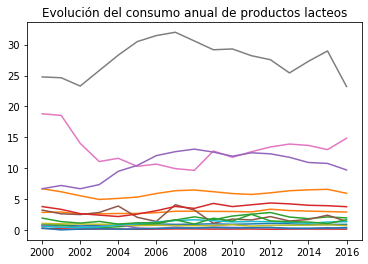

In [42]:
plt.plot(consumo_anual)
plt.title('Evolución del consumo anual de productos lacteos')
plt.show()


Dado que no se puede observar bien el grafico seria conveniente graficar menor cantidad de lineas o bien utilizar la columna 'grupos' que incorporada con la operacion de merge:

* Lo primero que mostraremos es como graficar solo algunas columnas de todo el dataframe:

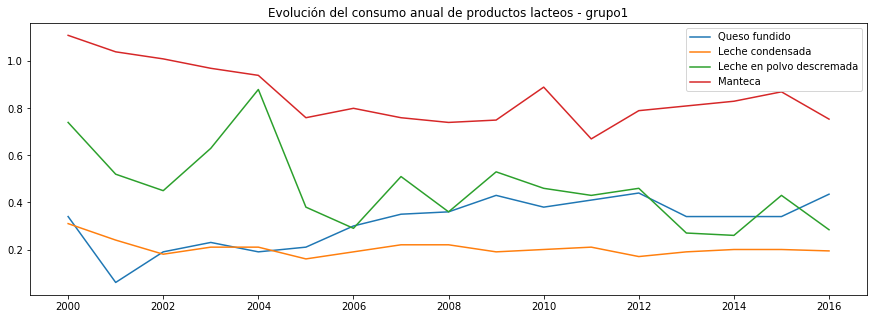

In [43]:
plt.figure(figsize=(15,5))

plt.plot(consumo_anual.loc[:,['Queso fundido','Leche condensada','Leche en polvo descremada','Manteca']])
plt.title('Evolución del consumo anual de productos lacteos - grupo1')
plt.legend(['Queso fundido','Leche condensada','Leche en polvo descremada','Manteca'])
plt.show()


Como vemos en el codigo mas arriba simplemente con indicarle qué columnas queremos incorporar al dataframe es suficiente. Ahora veremos como hariamos para graficar directamente los datos mas agrupados:

Necesitamos volver a generar la tabla dinamica, pero ahora en las columnas en lugar de los productos vamos a poner los grupos de productos:

In [44]:
consumo_anual_por_grupo = pd.pivot_table(df_lacteos, columns='grupo', index=['año'], values='consumo_per_cápita', aggfunc='sum')
consumo_anual_por_grupo.head(5)

grupo,g1,g2,g3,g4
año,,,,
2000,2.50,4.25,16.69,50.30
2001,1.86,3.61,15.21,50.44
2002,1.83,2.75,13.41,44.05
2003,2.04,3.20,12.97,44.28
2004,2.22,3.40,14.00,49.45


Ahora graficamos el nuevo dataframe:

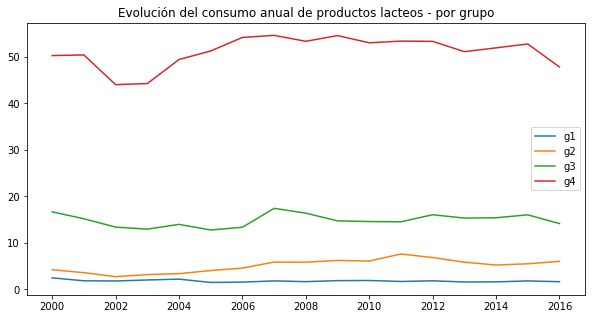

In [45]:
plt.figure(figsize=(10,5))

plt.plot(consumo_anual_por_grupo)
plt.title('Evolución del consumo anual de productos lacteos - por grupo')
plt.legend(consumo_anual_por_grupo.columns)
plt.show()

Dado que el grafico ya permite ir entendiendo un poco los datos, es importante describir lo que se ve para que quede documentado y para ir "contando la historia". Por ejemplo:  

En el grafico puede verse como el consumo percapita del grupo uno que es el de mayor volumen se ha visto afectado en las distitas crisis, por otro lado el consumo percapita del grupo 3 tuvo un pico de incremento en 2017 manteniendo un nivel superior al del periodo previo. Ahora vamos a indagar para averiguar puntualmente qué productos fueron los que mas se consumieron del grupo 3 graficando:

In [46]:
df_grupo3 = df_lacteos.loc[df_lacteos.grupo=='g3',:]

In [47]:
productos_grupo_3 = pd.pivot_table(df_grupo3, columns='producto', index=['año'], values='consumo_per_cápita', aggfunc='sum')

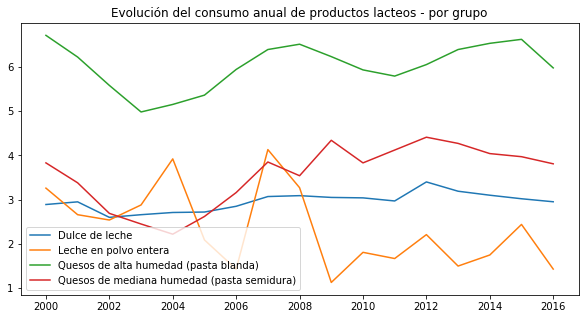

In [48]:
plt.figure(figsize=(10,5))
plt.plot(productos_grupo_3)
plt.title('Evolución del consumo anual de productos lacteos - por grupo')
plt.legend(productos_grupo_3.columns)
plt.show()

* Construir tabla con variaciones:  
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.pct_change.html

In [49]:
consumo_anual_por_grupo.pct_change()

grupo,g1,g2,g3,g4
año,,,,
2000,NaN,NaN,NaN,NaN
2001,-0.256000,-0.150588,-0.088676,0.002783
2002,-0.016129,-0.238227,-0.118343,-0.126685
2003,0.114754,0.163636,-0.032811,0.005221
2004,0.088235,0.062500,0.079414,0.116757
2005,-0.319820,0.197059,-0.086429,0.037209
2006,0.046358,0.130221,0.046130,0.056736
2007,0.164557,0.280435,0.303438,0.008303
2008,-0.086957,-0.005093,-0.059060,-0.023422


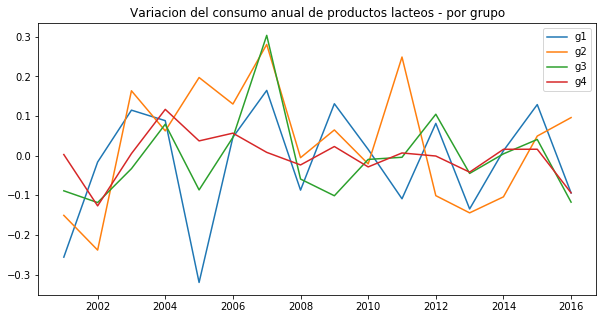

In [50]:
plt.figure(figsize=(10,5))
plt.plot(consumo_anual_por_grupo.pct_change())
plt.title('Variacion del consumo anual de productos lacteos - por grupo')
plt.legend(consumo_anual_por_grupo.columns)
plt.show()

* Exportar a excel algun resultado:

In [53]:
consumo_anual_por_grupo.to_excel("output.xlsx")

## De yapa:

Ahora haremos una funcion en la que le pasemos como parametros lo que querramos graficas y automaticamente nos grafique, para mostrar como se podria automatizar la tarea de graficar.

In [58]:
def grafico_automatico(df, column):
    
    df_sub = df.loc[:,column]
    
    plt.figure(figsize=(10,5))
    plt.plot(df_sub)
    plt.title('grafico de '+column)
    plt.legend(column)
    plt.show()


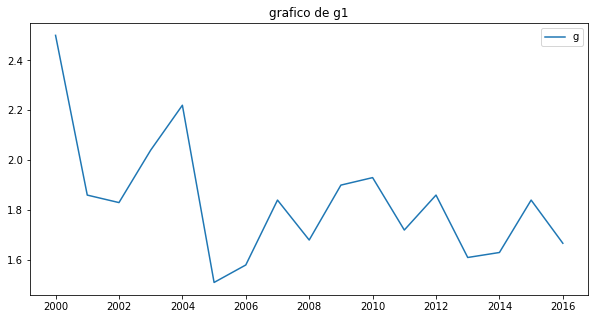

In [59]:
grafico_automatico(consumo_anual_por_grupo, 'g1')

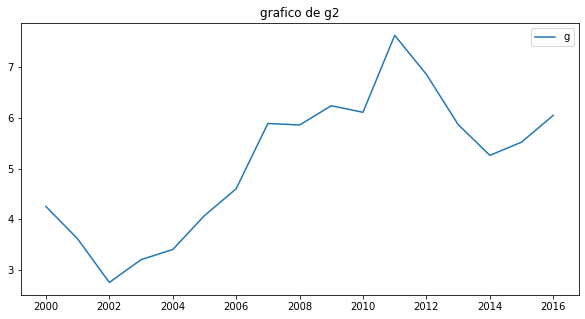

In [60]:
grafico_automatico(consumo_anual_por_grupo, 'g2')

Como iterar para hacer diferentes graficos automaticamente:

In [62]:
grupos = consumo_anual_por_grupo.columns

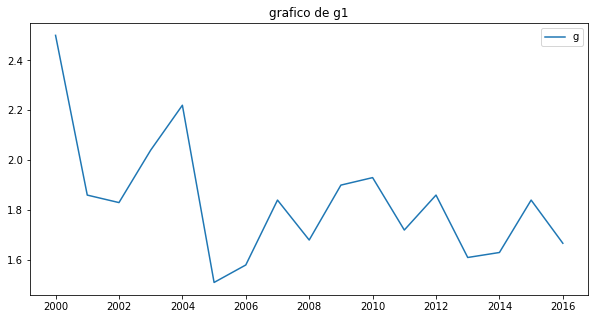

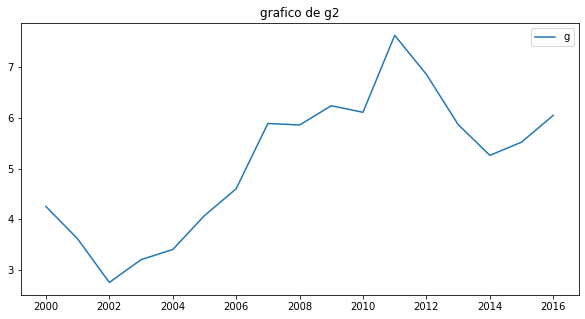

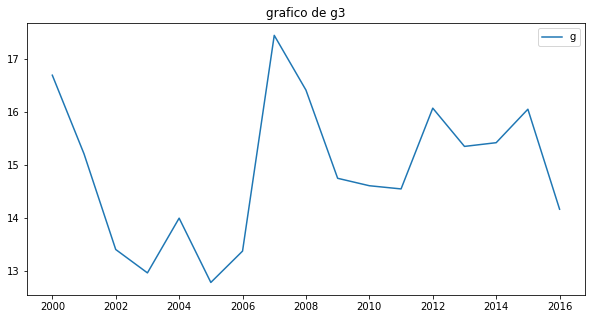

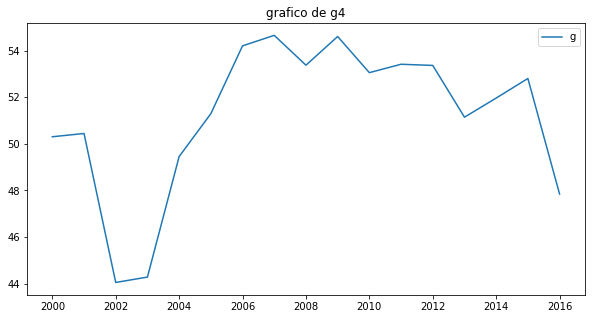

In [64]:
for grupo in grupos:
    grafico_automatico(consumo_anual_por_grupo, grupo)

Lo mismo para los productos:

In [65]:
productos = consumo_anual.columns

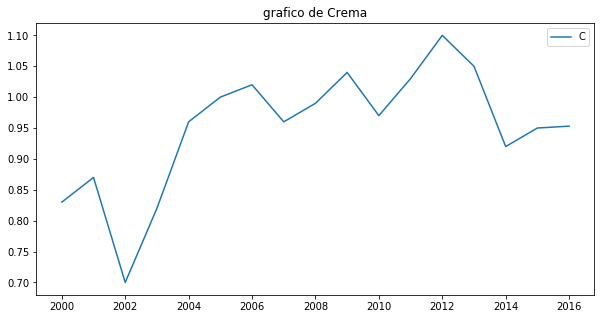

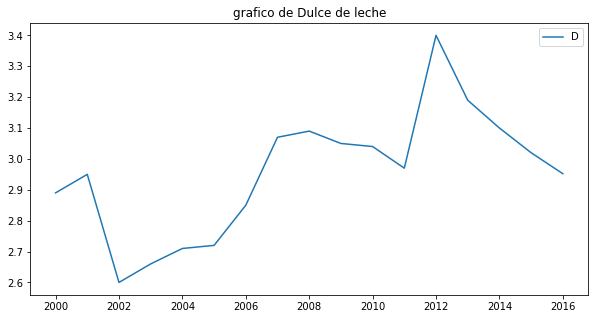

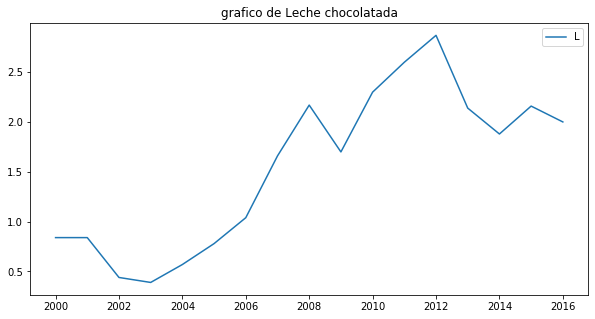

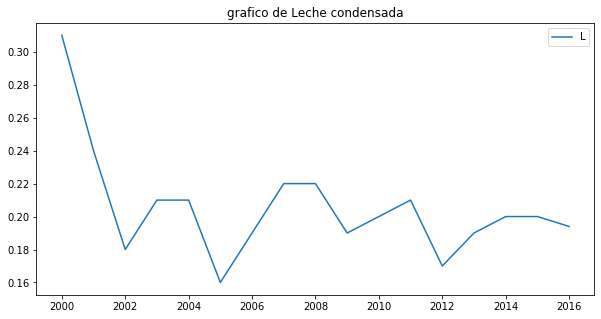

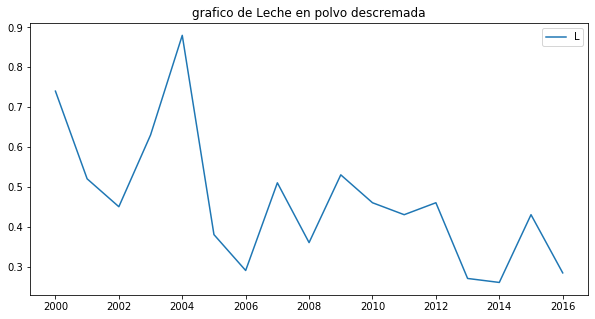

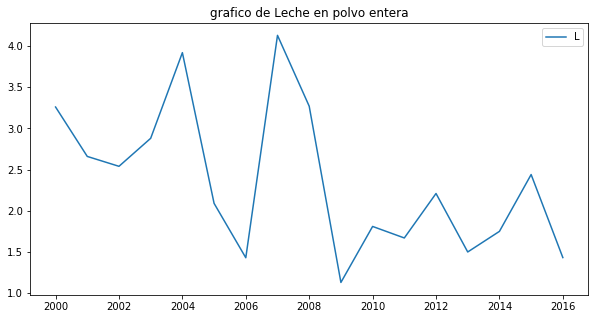

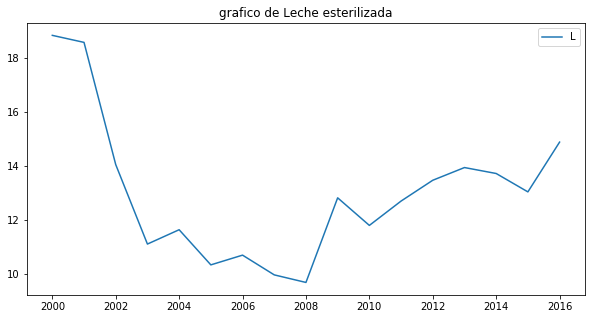

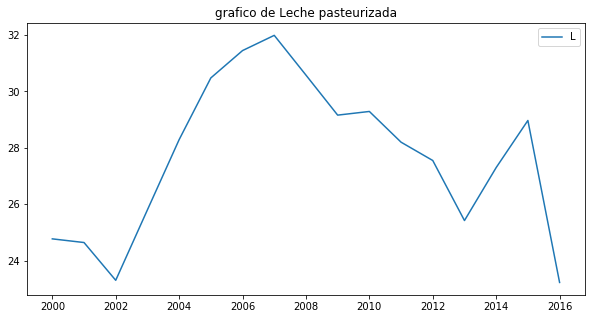

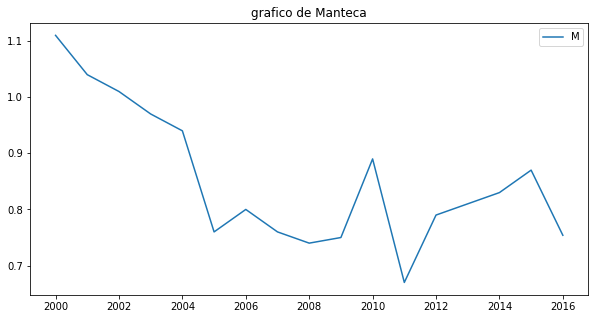

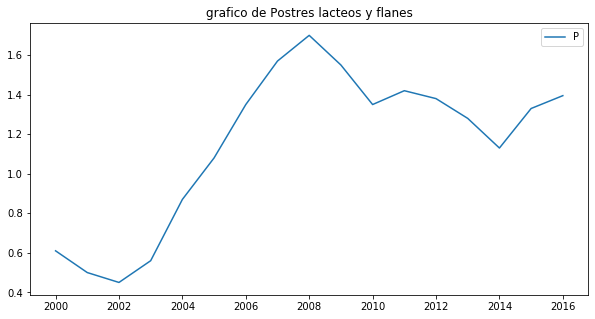

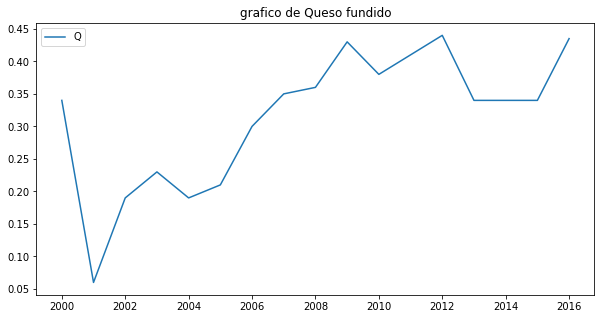

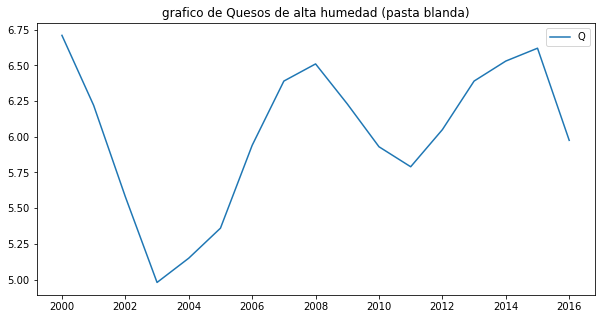

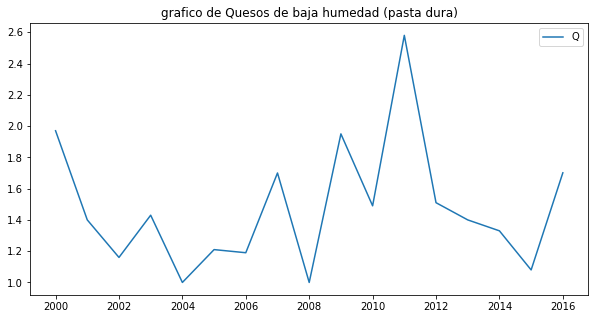

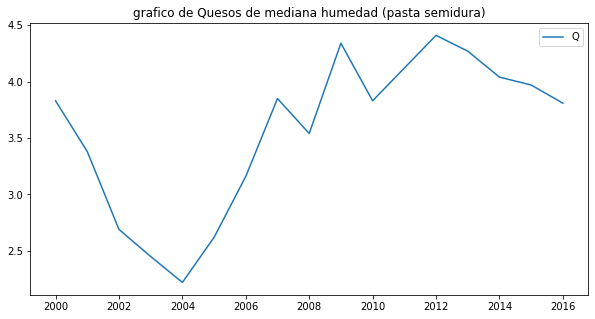

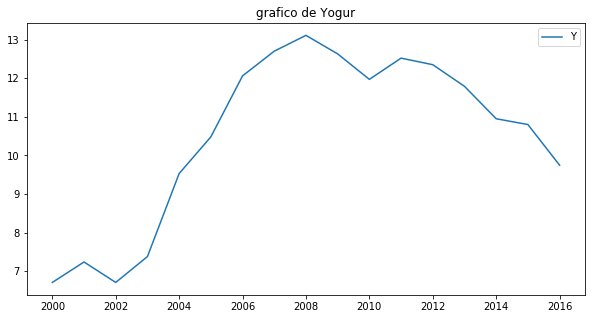

In [66]:
for producto in productos:
    grafico_automatico(consumo_anual, producto)

Ahora manos a la obra con tu propio dataset!!  
Por cualquier consulta ademas de googlearlo podes preguntarme a mluzpizarro@gmail.com